# Dataset investigation and initial visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pydicom
from pydicom import dcmread
import glob
from tqdm import tqdm
import os

cmmd_manifest_directory = "/media/craig/Larry/python/manifest-1616439774456/"
path_to_clinical_data = "/media/craig/Larry/python/CMMD_clinicaldata_revision.xlsx"

# CMMD Sample

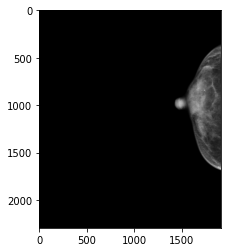

In [2]:
cmmd_file_path = cmmd_manifest_directory+"/CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000-NA-70244/1-1.dcm"

ds = pydicom.dcmread(cmmd_file_path)
plt.imshow(ds.pixel_array, cmap=plt.cm.gray) 

In [3]:

ds = dcmread(cmmd_file_path)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1239.1759.171167992666098963734790598197
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20170818'
(0008, 0013) Instance Creation Time              TM: '114639'
(000

Text(0.5, 1.0, 'medio-lateral oblique')

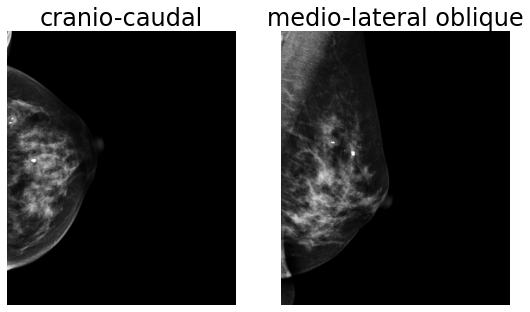

In [4]:
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread

#Plot display code edited from https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
    
# create figure
fig = plt.figure(figsize=(9, 9))
  
# setting values to rows and column variables
rows = 1
columns = 2

cmmd_file_path = cmmd_manifest_directory+"/CMMD/D1-0287/07-18-2011-NA-NA-72228/1.000000-NA-13583/1-1.dcm"

Image1 = pydicom.dcmread(cmmd_file_path)

cmmd_file_path = cmmd_manifest_directory+"/CMMD/D1-0287/07-18-2011-NA-NA-72228/1.000000-NA-13583/1-2.dcm"

Image2 = pydicom.dcmread(cmmd_file_path)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1.pixel_array, cmap=plt.cm.gray)
plt.axis('off')
plt.title("cranio-caudal", fontsize=24)
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2.pixel_array, cmap=plt.cm.gray)
plt.axis('off')
plt.title("medio-lateral oblique", fontsize=24)
# plt.savefig("./output/cmmd_projection_compare.png", bbox_inches="tight")

In [5]:
cmmd_root = "/media/craig/6848080D4807D928/st_andrews/CMMD_dataset/manifest-1616439774456"

ds1 = dcmread(cmmd_root+"/CMMD/D1-0021/07-18-2010-45484/1.000000-37894/1-1.dcm")
ds2 = dcmread(cmmd_root+"/CMMD/D1-0021/07-18-2010-45484/1.000000-37894/1-3.dcm")

In [6]:
#Uncomment below to get dicom metadata
# ds1

In [7]:
#Uncomment below to get dicom metadata
# ds2

In [8]:
path_to_metadata = cmmd_manifest_directory+"metadata.csv"

clinical_data = pd.read_excel(path_to_clinical_data)
meta_data = pd.read_csv(path_to_metadata)

In [9]:
#Uncomment below to display data
#clinical_data

In [10]:
#Uncomment below to display data
#meta_data

In [11]:
#Subset into only SubjectID, Number of Images, and File Location
meta_subset = meta_data.loc[:, ['Subject ID','Number of Images', 'File Location']]

In [12]:
#Uncomment below to display data
#meta_subset

In [13]:
#Align column name
df1 = clinical_data.rename(columns={"ID1": "Subject_ID"})
df2 = meta_subset.rename(columns={"Subject ID": "Subject_ID"})

In [14]:
# Merge the two dataframes, using _ID column as key
df3 = pd.merge(df1, df2, on = 'Subject_ID')
df3.set_index('Subject_ID', inplace = True)

In [15]:
#Uncomment below to display data
# df3

In [16]:
#Add column for image 1 and image 2
df3['img_1'] = ''
df3['img_2'] = ''

In [17]:
#Uncomment below to display data
# df3

In [18]:
#Sort for cases where single patient_id's have >2 mammography images
for i in tqdm(range(len(df3))):
    if i==0:
        continue
        
    #If the current file path is the same as the previous path
    if df3.iloc[i]['File Location'] == df3.iloc[i-1]['File Location']:
        #If file path is the same as previous, that means there is >2
        df3.iloc[i, df3.columns.get_loc('img_1')] = "1-3.dcm"
        df3.iloc[i, df3.columns.get_loc('img_2')] = "1-4.dcm"
    else:
        df3.iloc[i, df3.columns.get_loc('img_1')] = "1-1.dcm"
        df3.iloc[i, df3.columns.get_loc('img_2')] = "1-2.dcm"

100%|██████████| 1641/1641 [00:00<00:00, 2424.83it/s]


In [19]:
#Create new empty dataframe
df4 = pd.DataFrame(columns=["subject_id", "leftright", "age", "abnormality",
                            "classification", "subtype", "file_location"])


In [20]:
#Uncomment below to see dataframe headings.
# df4

In [21]:
#fix index, one to right.
df3 = df3.reset_index()

In [22]:
df3.head(5)

,Subject_ID,LeftRight,Age,number,abnormality,classification,subtype,Number of Images,File Location,img_1,img_2
0,D1-0001,R,44,2,calcification,Benign,NaN,2,./CMMD/D1-0001/07-18-2010-NA-NA-79377/1.000000...,,
1,D1-0002,L,40,2,calcification,Benign,NaN,2,./CMMD/D1-0002/07-18-2010-NA-NA-49231/1.000000...,1-1.dcm,1-2.dcm
2,D1-0003,L,39,2,calcification,Benign,NaN,2,./CMMD/D1-0003/07-18-2011-NA-NA-25491/1.000000...,1-1.dcm,1-2.dcm
3,D1-0004,L,41,2,calcification,Benign,NaN,2,./CMMD/D1-0004/07-18-2011-NA-NA-14914/1.000000...,1-1.dcm,1-2.dcm
4,D1-0005,R,42,2,calcification,Benign,NaN,2,./CMMD/D1-0005/07-18-2011-NA-NA-52347/1.000000...,1-1.dcm,1-2.dcm


In [23]:
# Iterate through each line in the dataframe, determine file
# location based on odd/even integers for scan type. (see pdf
# for data stratificaiton explanation)
def create_row(i, df4, flag=False):
    appended_data = []
    j = 0
    while j < 2:

        if not flag:
            if j == 0:
                file_loc = str(df3.iloc[i, df3.columns.get_loc('File Location')])+"/1-1.dcm"
            else:
                file_loc = str(df3.iloc[i, df3.columns.get_loc('File Location')])+"/1-2.dcm"
        
        if flag:
            if j == 0:
                file_loc = str(df3.iloc[i, df3.columns.get_loc('File Location')])+"/1-3.dcm"
            else:
                file_loc = str(df3.iloc[i, df3.columns.get_loc('File Location')])+"/1-4.dcm"
# Uncomment if debugging
#         print("iteration:"+str(i))
#         print(file_loc)
        new_row = {
            'subject_id':    df3.iloc[i, df3.columns.get_loc('Subject_ID')],
            'leftright':     df3.iloc[i, df3.columns.get_loc('LeftRight')],
            'age':           df3.iloc[i, df3.columns.get_loc('Age')],
            'abnormality':   df3.iloc[i, df3.columns.get_loc('abnormality')],
            'classification':df3.iloc[i, df3.columns.get_loc('classification')],
            'subtype':       df3.iloc[i, df3.columns.get_loc('subtype')],
            'file_location': file_loc
        }
        appended_data.append(new_row)
        df4 = df4.append(new_row, ignore_index=True)
#         print(len(df4))
        j += 1
    return appended_data
        
        

    

In [24]:
#For all items in the manifest
for i in tqdm(range(len(df3))):
    #skip 0th item because cant compare to -1th item.
    if i==0:
        #create regular row
        data_to_append = create_row(i, df4)
        
        df4 = df4.append(data_to_append, ignore_index=True)
        continue
    #if the file location equals the same as the one before...
    if df3.iloc[i]['File Location'] == df3.iloc[i-1]['File Location']:
        #True because this folder has 1,2,3,4 images
        data_to_append = create_row(i, df4, True)
        
        df4 = df4.append(data_to_append, ignore_index=True)
    else:
        data_to_append = create_row(i, df4)
        
        df4 = df4.append(data_to_append, ignore_index=True)

100%|██████████| 1641/1641 [00:09<00:00, 171.50it/s]


In [25]:
#Uncomment to display final dataframe preview
# df4

In [26]:
df4.to_csv("./CMMD_metadata_subset.csv", index=False)

In [27]:
#Append the /path/to/manifest/ to "1-1.dcm" or "1-2.dcm" etc...
for i in tqdm(range(len(df4))):
    begin_path = cmmd_manifest_directory[:-1]
    acc_file = df4.iloc[i]['file_location']
    my_file_loc = str(begin_path+acc_file[1:])
    if not os.path.isfile(my_file_loc):
        print("WARNING, the following file does not exist:\n"+my_file_loc)

100%|██████████| 3282/3282 [00:00<00:00, 6460.79it/s]


In [28]:
#Save newly curated metadata file.
df4.to_csv('CMMD_metadata.csv', encoding='utf-8')